In [114]:
import sys, time
import os.path
import argparse
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [123]:
filename = "../dali-u100_fel1d.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


reading  ../dali-u100_fel1d.hdf5

field size = 300,  steps = 150101,  dt = 3.336e-14 s
propagation step =  [-0.e+00 -0.e+00 -1.e-05]
origin position =  [0.         0.         0.00149896]
have read (150101, 300) array.


<IPython.core.display.Javascript object>


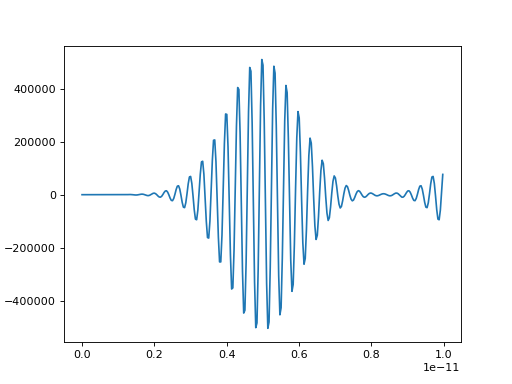

In [124]:
E_x = np.array(a[100])
t = dt*np.arange(E_x.shape[0])
plt.plot(t,E_x)
plt.show()

<IPython.core.display.Javascript object>


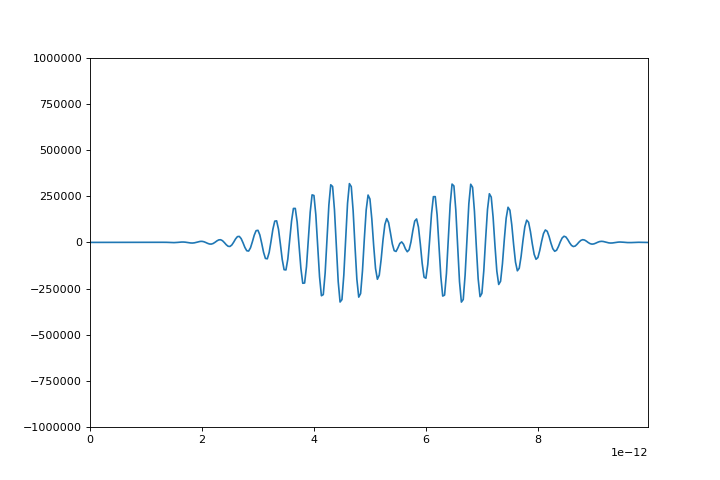

In [126]:
fig, ax = plt.subplots(figsize=(9,6))
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(t[0], t[-1])
ax.set_ylim(-1e6, 1e6)
# anno = ax.text(0.75 ,0.85, f'c*t = {t_head*sc.c:.6f} m', transform=ax.transAxes, size=14)

def step(frame_num):
    global a
    E_x = np.array(a[frame_num])
    line.set_data((t, E_x))
    # anno.set_text(f'c*t = {t_head*sc.c:.6f} m')
    return line

anim = FuncAnimation(fig, step, frames=100, interval=200)

plt.show()